In [11]:
import pandas as pd
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder

In [145]:
nba_teams = teams.get_teams()
# Select the dictionary for the Celtics, which contains their team ID
celtics = [team for team in nba_teams if team["abbreviation"] == "BOS"][0]
celtics_id = celtics["id"]

In [146]:
# Query for games where the Celtics were playing
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=celtics_id)
# The first DataFrame of those returned is what we want.
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22024,1610612738,BOS,Boston Celtics,0022400542,2025-01-12,BOS vs. NOP,W,241,120,...,0.826,18,37,55,23,5,7,11,18,1.0
1,22024,1610612738,BOS,Boston Celtics,0022400528,2025-01-10,BOS vs. SAC,L,238,97,...,0.818,8,35,43,22,5,7,15,14,-17.0
2,22024,1610612738,BOS,Boston Celtics,0022400507,2025-01-07,BOS @ DEN,W,241,118,...,0.900,11,30,41,30,11,7,11,13,12.0
3,22024,1610612738,BOS,Boston Celtics,0022400487,2025-01-05,BOS @ OKC,L,241,92,...,0.875,12,36,48,17,6,5,16,18,-13.0
4,22024,1610612738,BOS,Boston Celtics,0022400471,2025-01-03,BOS @ HOU,W,242,109,...,0.667,12,29,41,20,6,8,14,13,23.0


In [147]:
games.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [148]:
celtics_mean = games[
    [
        "MIN",
        "PTS",
        "FGM",
        "FGA",
        "FG_PCT",
        "FG3M",
        "FG3A",
        "FG3_PCT",
        "FTM",
        "FTA",
        "FT_PCT",
        "OREB",
        "DREB",
        "REB",
        "AST",
        "STL",
        "BLK",
        "TOV",
        "PF",
    ]
].mean()
print(celtics_mean)

MIN        240.597576
PTS        103.680889
FGM         38.937894
FGA         83.547337
FG_PCT       0.466480
FG3M         6.721787
FG3A        18.932340
FG3_PCT      0.337131
FTM         19.083312
FTA         24.641252
FT_PCT       0.774942
OREB        11.260288
DREB        31.275940
REB         42.536228
AST         23.620045
STL          8.046958
BLK          4.934360
TOV         14.467559
PF          22.064630
dtype: float64


In [149]:
games['GAME_DATE'] = pd.to_datetime(games['GAME_DATE'])

In [150]:
games['SEASON_ID']

0       22024
1       22024
2       22024
3       22024
4       22024
        ...  
3956    21983
3957    21983
3958    21983
3959    21983
3960    21983
Name: SEASON_ID, Length: 3961, dtype: object

In [151]:
celtics_games_12_24 = games[
    games["SEASON_ID"].isin(
        [
            "22024",
            "22023",
            "22022",
            "22021",
            "22020",
            "22019",
            "22018",
            "22017",
            "22016",
            "22015",
            "22014",
            "22013",
            "22012",
        ]
    )
]
celtics_games_12_24

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22024,1610612738,BOS,Boston Celtics,0022400542,2025-01-12,BOS vs. NOP,W,241,120,...,0.826,18,37,55,23,5,7,11,18,1.0
1,22024,1610612738,BOS,Boston Celtics,0022400528,2025-01-10,BOS vs. SAC,L,238,97,...,0.818,8,35,43,22,5,7,15,14,-17.0
2,22024,1610612738,BOS,Boston Celtics,0022400507,2025-01-07,BOS @ DEN,W,241,118,...,0.900,11,30,41,30,11,7,11,13,12.0
3,22024,1610612738,BOS,Boston Celtics,0022400487,2025-01-05,BOS @ OKC,L,241,92,...,0.875,12,36,48,17,6,5,16,18,-13.0
4,22024,1610612738,BOS,Boston Celtics,0022400471,2025-01-03,BOS @ HOU,W,242,109,...,0.667,12,29,41,20,6,8,14,13,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,22012,1610612738,BOS,Boston Celtics,1421200018,2012-07-13,BOS @ ORL,W,201,94,...,0.778,11,28,39,14,10,5,10,14,21.0
1295,22012,1610612738,BOS,Boston Celtics,1421200013,2012-07-12,BOS vs. DET,L,200,79,...,0.778,11,31,42,9,7,8,15,20,-9.0
1296,22012,1610612738,BOS,Boston Celtics,1421200009,2012-07-11,BOS vs. IND,W,202,85,...,0.737,5,32,37,16,10,7,20,22,8.0
1297,22012,1610612738,BOS,Boston Celtics,1421200008,2012-07-10,BOS vs. BKN,W,199,82,...,0.708,12,25,37,15,7,6,13,23,9.0


In [152]:
# First, drop the specified columns from celtics_games_12_24
celtics_games_12_24 = celtics_games_12_24.drop(
    columns=["TEAM_ID", "TEAM_ABBREVIATION", "TEAM_NAME", "GAME_ID","GAME_DATE", "MATCHUP", "WL"]
)


In [160]:
# Then, group by 'SEASON_ID' and calculate the mean for the remaining columns
celtics_games = celtics_games_12_24.groupby("SEASON_ID").mean()
# Reset the index and rename it to 'Season'
celtics_games= celtics_games.reset_index().rename(columns={"SEASON_ID": "Season"})
celtics_games

,Season,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22012,240.000000,94.978022,36.142857,78.879121,0.459363,6.274725,17.736264,0.356286,16.417582,...,0.770780,8.351648,30.890110,39.241758,21.527473,8.131868,4.615385,13.868132,21.098901,0.186813
1,22013,238.252874,95.735632,36.264368,83.068966,0.438529,6.977011,21.103448,0.325908,16.229885,...,0.784207,11.954023,30.160920,42.114943,20.873563,7.310345,4.160920,14.620690,21.206897,-3.781609
2,22015,237.744444,103.922222,38.166667,87.566667,0.435589,8.688889,26.044444,0.335200,18.900000,...,0.789411,11.355556,32.777778,44.133333,23.277778,9.111111,4.311111,13.144444,21.688889,3.328889
3,22016,237.566667,105.866667,37.622222,83.344444,0.451700,11.644444,32.566667,0.356444,18.977778,...,0.802300,9.111111,32.288889,41.400000,24.044444,7.622222,4.100000,12.866667,20.888889,2.291111
4,22017,237.988889,101.822222,37.455556,83.388889,0.449667,11.066667,29.555556,0.377622,15.844444,...,0.762744,9.177778,35.044444,44.222222,21.611111,7.322222,4.588889,13.666667,19.766667,3.346667
5,22018,238.397727,110.409091,41.375000,89.250000,0.464102,12.204545,33.670455,0.359614,15.454545,...,0.803773,9.818182,34.295455,44.113636,25.636364,8.488636,5.238636,12.375000,20.250000,4.468182
6,22019,236.371795,111.076923,40.358974,87.717949,0.459615,12.243590,33.807692,0.359628,18.115385,...,0.799182,10.692308,34.730769,45.423077,22.448718,8.269231,5.525641,13.076923,21.384615,6.441026
7,22020,241.291667,112.625000,41.458333,88.902778,0.467361,13.597222,36.361111,0.375472,16.111111,...,0.778292,10.625000,33.625000,44.250000,23.458333,7.722222,5.319444,13.388889,20.430556,1.458333
8,22021,240.540230,110.701149,40.413793,86.689655,0.466908,13.264368,37.172414,0.353483,16.609195,...,0.809230,10.390805,35.471264,45.862069,24.793103,7.149425,5.804598,13.183908,18.724138,7.519540
9,22022,241.402299,116.850575,41.735632,88.091954,0.474253,15.885057,42.218391,0.375034,17.494253,...,0.810632,9.747126,35.126437,44.873563,26.459770,6.379310,5.264368,12.885057,19.011494,6.377011


In [161]:
celtics_games.iloc[0,0] = 2012
celtics_games.iloc[1,0] = 2013
celtics_games.iloc[2,0] = 2014
celtics_games.iloc[3,0] = 2015
celtics_games.iloc[4,0] = 2016
celtics_games.iloc[5,0] = 2017
celtics_games.iloc[6,0] = 2018
celtics_games.iloc[7,0] = 2019
celtics_games.iloc[8,0] = 2020
celtics_games.iloc[9,0] = 2021
celtics_games.iloc[10,0] = 2022
celtics_games.iloc[11,0] = 2023

# Now, 'Season' is a column in your DataFrame
celtics_games

,Season,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,2012,240.000000,94.978022,36.142857,78.879121,0.459363,6.274725,17.736264,0.356286,16.417582,...,0.770780,8.351648,30.890110,39.241758,21.527473,8.131868,4.615385,13.868132,21.098901,0.186813
1,2013,238.252874,95.735632,36.264368,83.068966,0.438529,6.977011,21.103448,0.325908,16.229885,...,0.784207,11.954023,30.160920,42.114943,20.873563,7.310345,4.160920,14.620690,21.206897,-3.781609
2,2014,237.744444,103.922222,38.166667,87.566667,0.435589,8.688889,26.044444,0.335200,18.900000,...,0.789411,11.355556,32.777778,44.133333,23.277778,9.111111,4.311111,13.144444,21.688889,3.328889
3,2015,237.566667,105.866667,37.622222,83.344444,0.451700,11.644444,32.566667,0.356444,18.977778,...,0.802300,9.111111,32.288889,41.400000,24.044444,7.622222,4.100000,12.866667,20.888889,2.291111
4,2016,237.988889,101.822222,37.455556,83.388889,0.449667,11.066667,29.555556,0.377622,15.844444,...,0.762744,9.177778,35.044444,44.222222,21.611111,7.322222,4.588889,13.666667,19.766667,3.346667
5,2017,238.397727,110.409091,41.375000,89.250000,0.464102,12.204545,33.670455,0.359614,15.454545,...,0.803773,9.818182,34.295455,44.113636,25.636364,8.488636,5.238636,12.375000,20.250000,4.468182
6,2018,236.371795,111.076923,40.358974,87.717949,0.459615,12.243590,33.807692,0.359628,18.115385,...,0.799182,10.692308,34.730769,45.423077,22.448718,8.269231,5.525641,13.076923,21.384615,6.441026
7,2019,241.291667,112.625000,41.458333,88.902778,0.467361,13.597222,36.361111,0.375472,16.111111,...,0.778292,10.625000,33.625000,44.250000,23.458333,7.722222,5.319444,13.388889,20.430556,1.458333
8,2020,240.540230,110.701149,40.413793,86.689655,0.466908,13.264368,37.172414,0.353483,16.609195,...,0.809230,10.390805,35.471264,45.862069,24.793103,7.149425,5.804598,13.183908,18.724138,7.519540
9,2021,241.402299,116.850575,41.735632,88.091954,0.474253,15.885057,42.218391,0.375034,17.494253,...,0.810632,9.747126,35.126437,44.873563,26.459770,6.379310,5.264368,12.885057,19.011494,6.377011


Not sure if the below is needed

In [80]:
# Define the columns once
stat_columns = [
    "MIN",
    "PTS",
    "FGM",
    "FGA",
    "FG_PCT",
    "FG3M",
    "FG3A",
    "FG3_PCT",
    "FTM",
    "FTA",
    "FT_PCT",
    "OREB",
    "DREB",
    "REB",
    "AST",
    "STL",
    "BLK",
    "TOV",
    "PF",
]

# Dictionary to store DataFrames for each year
celtics_games = {
    2024: celtics_games_24,
    2023: celtics_games_23,
    2022: celtics_games_22,
    2021: celtics_games_21,
    2020: celtics_games_20,
    2019: celtics_games_19,
    2018: celtics_games_18,
}

# Dictionary to store results
celtics = {}

# Loop through each year's data
for year, games in celtics_games.items():
    # Calculate mean for specified columns
    celtics[year] = games[stat_columns].mean()

# Print results
for year, mean in celtics.items():
    print(f"celtics_{year}:")
    print(mean)
    print()  

celtics_2024:
MIN        237.181818
PTS        115.477273
FGM         40.863636
FGA         89.136364
FG_PCT       0.458795
FG3M        17.113636
FG3A        47.727273
FG3_PCT      0.357205
FTM         16.636364
FTA         21.136364
FT_PCT       0.781909
OREB        11.363636
DREB        32.840909
REB         44.204545
AST         24.886364
STL          7.431818
BLK          5.727273
TOV         11.681818
PF          16.636364
dtype: float64

celtics_2023:
MIN        239.528736
PTS        118.977011
FGM         43.333333
FGA         89.379310
FG_PCT       0.485241
FG3M        16.103448
FG3A        41.758621
FG3_PCT      0.384391
FTM         16.206897
FTA         20.183908
FT_PCT       0.802349
OREB        10.712644
DREB        35.436782
REB         46.149425
AST         26.632184
STL          6.827586
BLK          6.551724
TOV         11.597701
PF          16.241379
dtype: float64

celtics_2022:
MIN        241.402299
PTS        116.850575
FGM         41.735632
FGA         88.091954
FG

In [88]:
# Change series to DataFrame
celtics_stats = pd.DataFrame.from_dict(celtics, orient='index') # orient 'index' or 'columns'
celtics_stats = celtics_stats.reset_index()
celtics_stats = celtics_stats.rename(columns={'index':'Season'})
celtics_stats

,Season,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF
0,2024,237.181818,115.477273,40.863636,89.136364,0.458795,17.113636,47.727273,0.357205,16.636364,21.136364,0.781909,11.363636,32.840909,44.204545,24.886364,7.431818,5.727273,11.681818,16.636364
1,2023,239.528736,118.977011,43.333333,89.379310,0.485241,16.103448,41.758621,0.384391,16.206897,20.183908,0.802349,10.712644,35.436782,46.149425,26.632184,6.827586,6.551724,11.597701,16.241379
2,2022,241.402299,116.850575,41.735632,88.091954,0.474253,15.885057,42.218391,0.375034,17.494253,21.540230,0.810632,9.747126,35.126437,44.873563,26.459770,6.379310,5.264368,12.885057,19.011494
3,2021,240.540230,110.701149,40.413793,86.689655,0.466908,13.264368,37.172414,0.353483,16.609195,20.517241,0.809230,10.390805,35.471264,45.862069,24.793103,7.149425,5.804598,13.183908,18.724138
4,2020,241.291667,112.625000,41.458333,88.902778,0.467361,13.597222,36.361111,0.375472,16.111111,20.777778,0.778292,10.625000,33.625000,44.250000,23.458333,7.722222,5.319444,13.388889,20.430556
5,2019,236.371795,111.076923,40.358974,87.717949,0.459615,12.243590,33.807692,0.359628,18.115385,22.743590,0.799182,10.692308,34.730769,45.423077,22.448718,8.269231,5.525641,13.076923,21.384615
6,2018,238.397727,110.409091,41.375000,89.250000,0.464102,12.204545,33.670455,0.359614,15.454545,19.340909,0.803773,9.818182,34.295455,44.113636,25.636364,8.488636,5.238636,12.375000,20.250000


# Visuals


In [162]:
import plotly.express as px

fig = px.line(celtics_games, x='Season', y='FG3A', markers= True)
fig.show()

In [165]:
celtics_games['Season'].dtype

dtype('O')

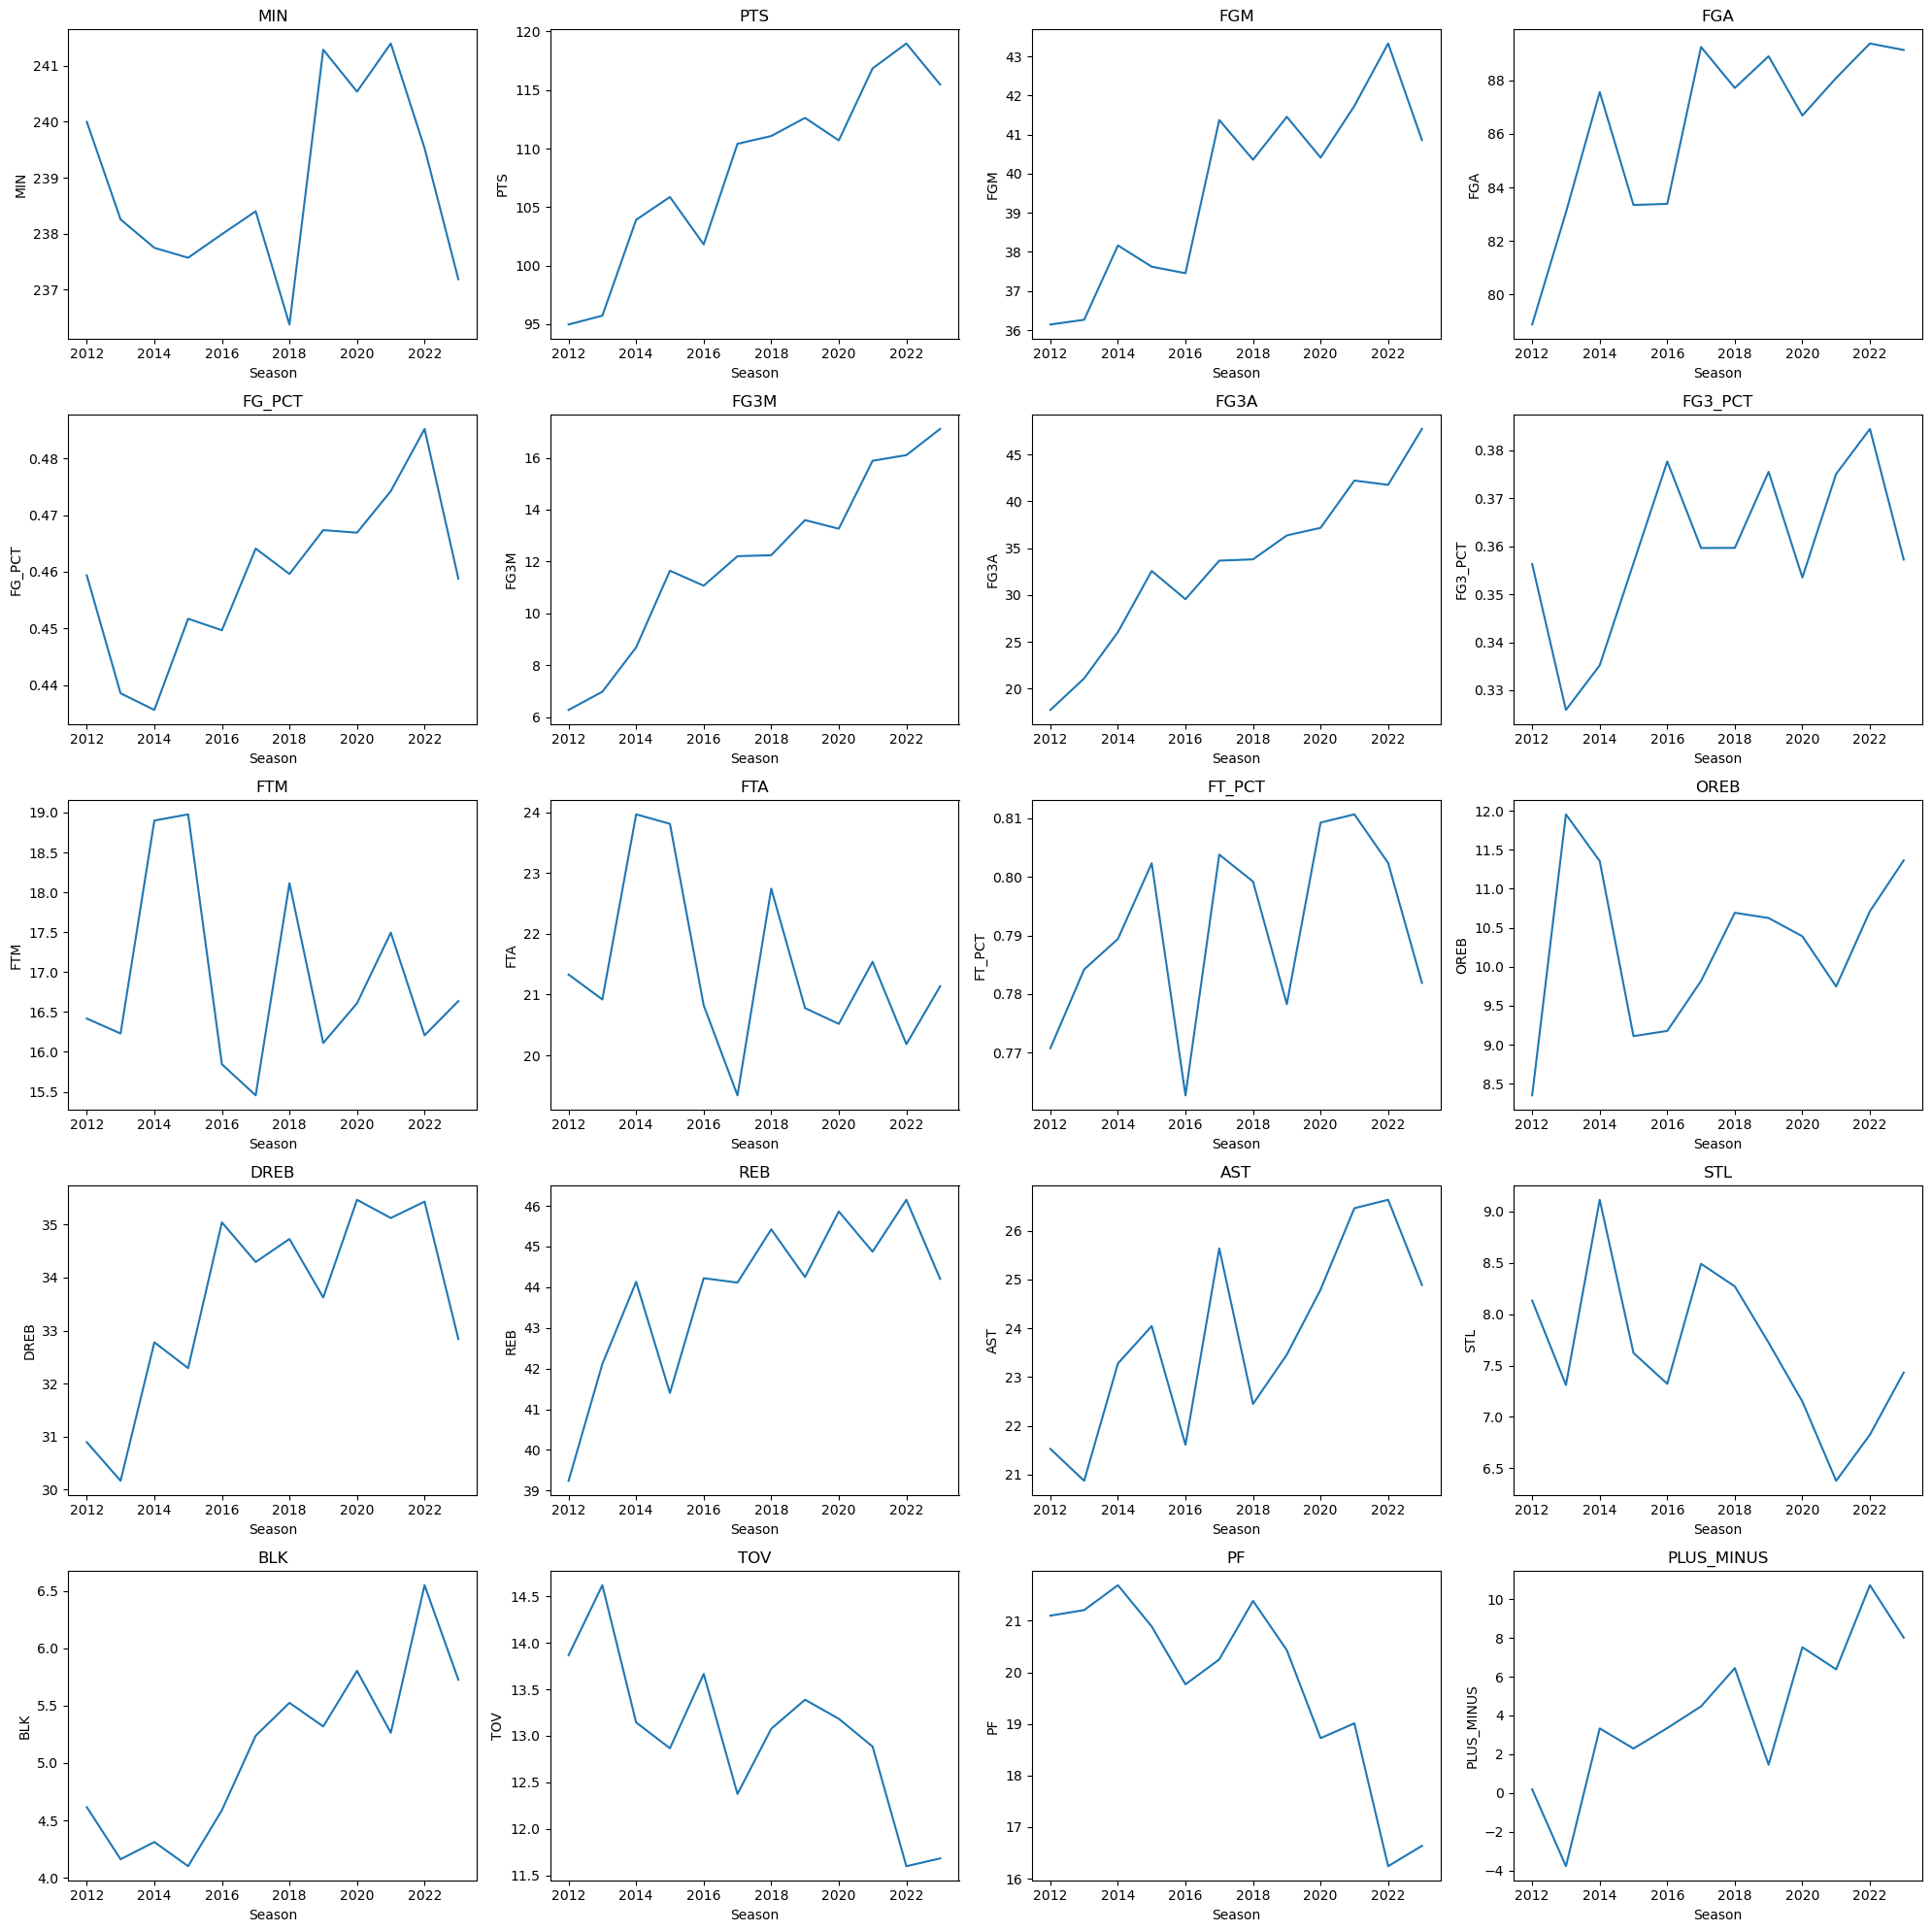

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
fig, axes = plt.subplots(5, 4, figsize=(20, 20))  # Adjust based on number of stats
axes = axes.ravel()

for i, col in enumerate(celtics_games.columns[1:]):  # Skip 'year' column
    sns.lineplot(data=celtics_games, x="Season", y=col, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

No data for year 2024


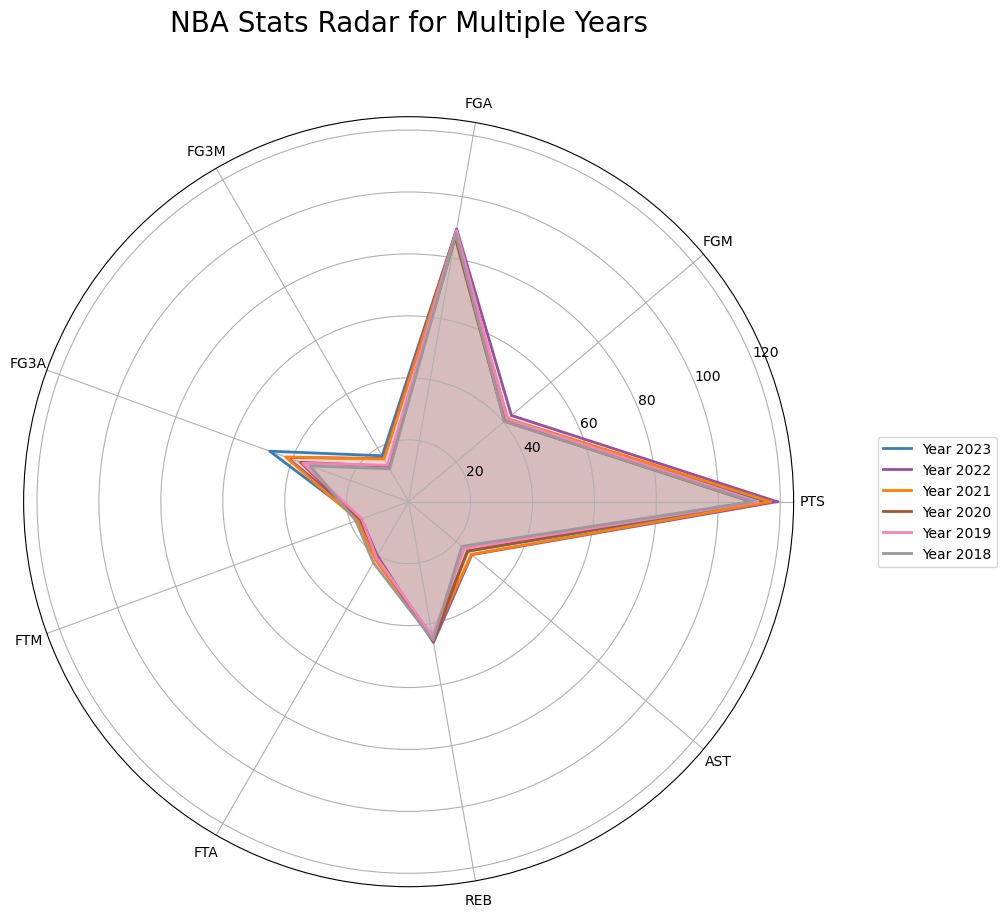

In [171]:
import matplotlib.pyplot as plt
from math import pi
import numpy as np


def create_multiyear_spider_plot(df, years, stats):
    categories = list(stats)
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    for year in years:
        # Filter data for the current year
        year_data = df[df["Season"] == year]
        if year_data.empty:
            print(f"No data for year {year}")
            continue

        values = year_data[stats].iloc[0].tolist()  # Assuming one row per year
        values += values[:1]

        # Use a different color for each year
        color = plt.cm.Set1(np.linspace(0, 1, len(years)))[years.index(year)]
        ax.plot(
            angles,
            values,
            linewidth=2,
            linestyle="solid",
            label=f"Year {year}",
            color=color,
        )
        ax.fill(angles, values, alpha=0.1, color=color)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Adjust the position of the legend
    ax.legend(loc="center left", bbox_to_anchor=(1.1, 0.5))
    plt.title("NBA Stats Radar for Multiple Years", size=20, y=1.1)
    plt.show()


# Example usage
stats_to_plot = [
    "PTS",
    "FGM",
    "FGA",
    "FG3M",
    "FG3A",
    "FTM",
    "FTA",
    "REB",
    "AST",
]

# Assuming you want to plot for years 2020, 2021, 2022
years_to_plot = [2024,2023,2022,2021,2020,2019,2018]  # Adjust these years based on your data

create_multiyear_spider_plot(celtics_games, years_to_plot, stats_to_plot)

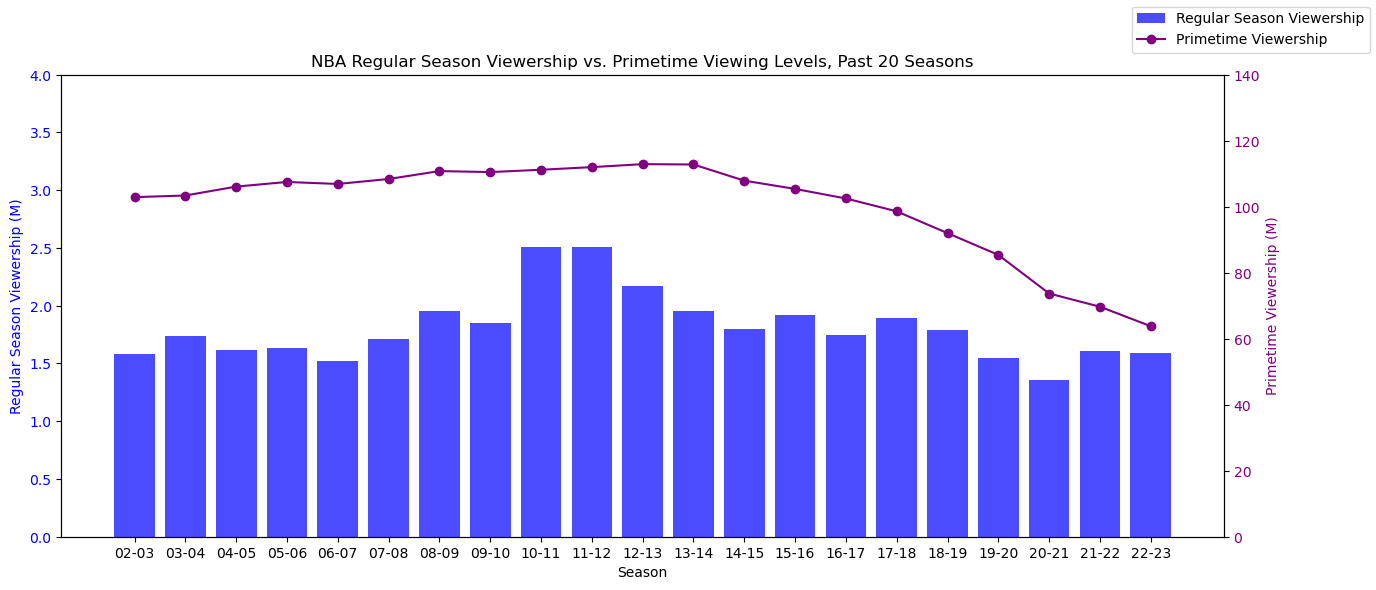

In [87]:
data = pd.read_csv("./nba_viewership.csv")

# Setup the figure and axes
fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 = ax1.twinx()

# Plotting
ax1.bar(
    data["Season"],
    data["Regular_Season_Viewership"],
    color="blue",
    alpha=0.7,
    label="Regular Season Viewership",
)
ax2.plot(
    data["Season"],
    data["Primetime_Viewership"],
    color="purple",
    marker="o",
    label="Primetime Viewership",
)

# Customizing
ax1.set_xlabel("Season")
ax1.set_ylabel("Regular Season Viewership (M)", color="blue")
ax2.set_ylabel("Primetime Viewership (M)", color="purple")
ax1.tick_params(axis="y", labelcolor="blue")
ax2.tick_params(axis="y", labelcolor="purple")
plt.title("NBA Regular Season Viewership vs. Primetime Viewing Levels, Past 20 Seasons")

# Adjusting scales
ax1.set_ylim(0, 4)
ax2.set_ylim(0, 140)

# Show legend
fig.legend(loc="upper right")

plt.show()

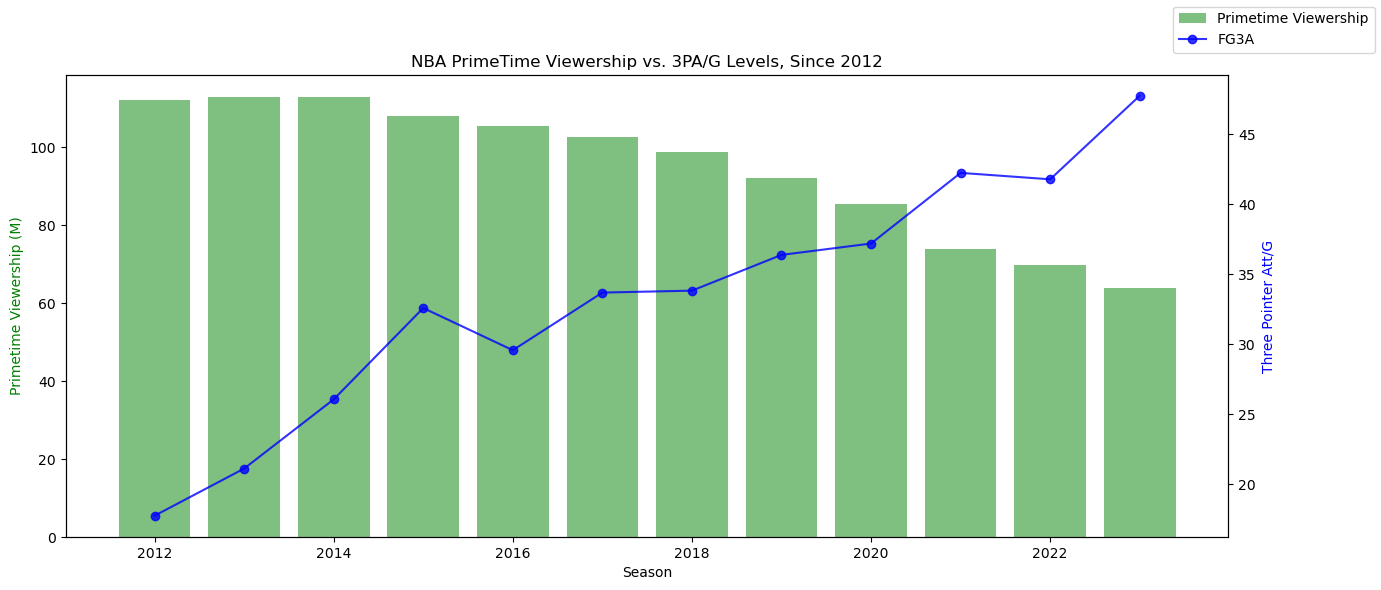

In [204]:
data = pd.read_csv("./nba_viewership.csv")

# Setup the figure and axes
fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 = ax1.twinx()

# Plotting
ax1.bar(
    data["Season"],
    data["Primetime_Viewership"],
    color="green",
    alpha=0.5,
    label="Primetime Viewership",
)
ax2.plot(
    celtics_games["Season"],
    celtics_games["FG3A"],
    color="blue",
    alpha=0.8,
    marker="o",
    label="FG3A",
)

# Customizing
ax1.set_xlabel("Season")
ax1.set_ylabel("Primetime Viewership (M)", color="green")
ax2.set_ylabel("Three Pointer Att/G", color="blue")
ax1.tick_params(axis="y", labelcolor="black")
ax2.tick_params(axis="y", labelcolor="black")
plt.title("NBA PrimeTime Viewership vs. 3PA/G Levels, Since 2012")

# Adjusting scales
# ax1.set_ylim(0, 150)
# ax2.set_ylim(0, 55)

# Show legend
fig.legend(loc="upper right")

plt.show()